# 201821002 이의민 중간고사 대체 과제

## 서울교통공사 승하차 인원 데이터를 가지고 주거지역과 도심지역을 구분하려고 한다.
## 최근 도심 공동화 현상이 고도화되고 있어 이에 대한 시각적 근거자료를 만들어보려고 한다.


In [91]:
import pandas as pd

df = pd.read_csv('서울교통공사_역별 일별 시간대별 승하차인원 정보_20230930.csv', encoding='euc-kr')

df

,연번,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2023-01-01,1호선,150,서울역,승차,215,145,231,594,...,2655,2509,2696,2549,2462,2177,2190,1808,734,7
1,2,2023-01-01,1호선,150,서울역,하차,154,636,595,939,...,2282,2295,2526,1930,1897,1487,991,609,280,46
2,3,2023-01-01,1호선,151,시청,승차,48,73,106,194,...,843,895,959,985,670,630,515,330,146,0
3,4,2023-01-01,1호선,151,시청,하차,64,247,293,463,...,602,575,533,456,285,267,246,154,79,18
4,5,2023-01-01,1호선,152,종각,승차,407,235,158,201,...,1145,1402,1223,1272,911,913,906,602,232,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148790,148791,2023-09-30,8호선,2826,수진,하차,8,0,8,40,...,195,165,136,171,190,178,132,153,162,133
148791,148792,2023-09-30,8호선,2827,모란,승차,39,0,39,34,...,200,189,205,233,219,169,103,137,117,105
148792,148793,2023-09-30,8호선,2827,모란,하차,9,0,9,45,...,132,156,164,165,216,215,176,121,113,113
148793,148794,2023-09-30,8호선,2828,남위례,승차,20,0,20,54,...,184,211,201,214,182,189,112,131,134,105


In [92]:
df.describe()

,연번,역번호,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
count,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,...,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000,148795.000000
mean,74398.000000,1615.073201,131.896576,243.290783,651.356914,1166.834732,993.894089,983.530959,789.427400,713.093874,...,800.089472,878.582943,1080.320710,1381.742774,1079.534877,993.400464,759.964663,596.922437,406.712813,231.558406
std,42953.560989,1172.862603,183.776074,354.583380,1024.569729,1904.198823,1313.571777,1423.153578,927.876575,633.975444,...,705.568729,788.845240,1128.122321,1674.353700,1184.632294,1332.387610,895.597026,705.943090,544.506831,440.875308
min,1.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37199.500000,317.000000,32.000000,2.000000,92.000000,228.000000,292.000000,316.000000,311.000000,316.000000,...,358.000000,388.000000,433.000000,469.000000,374.000000,297.000000,250.000000,196.000000,114.000000,20.000000
50%,74398.000000,2527.000000,67.000000,122.000000,260.000000,533.000000,584.000000,580.000000,541.000000,543.000000,...,603.000000,656.000000,746.000000,866.000000,714.000000,580.000000,475.000000,386.000000,248.000000,88.000000
75%,111596.500000,2640.000000,159.000000,320.000000,733.000000,1270.000000,1155.000000,1067.000000,922.000000,871.000000,...,985.000000,1085.000000,1290.000000,1602.000000,1309.000000,1136.500000,897.000000,717.000000,478.000000,254.000000
max,148795.000000,2828.000000,4640.000000,3312.000000,9135.000000,19038.000000,16168.000000,19267.000000,16309.000000,9867.000000,...,12488.000000,12561.000000,12437.000000,15240.000000,12803.000000,15348.000000,14150.000000,18966.000000,12400.000000,15421.000000


In [93]:
df.columns

Index(['연번', '수송일자', '호선', '역번호', '역명', '승하차구분', '06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후'],
      dtype='object')

## 여기서 사용할 데이터는 역명, 승하차구분
#### 출근 시간대 : '07-08시간대', '08-09시간대' 
#### 퇴근 시간대 : '18-19시간대','19-20시간대'

#### 호선과 날짜는 추후 삭제한다
#### 데이터를 추출한다

## 불필요한 칼럼 제거

In [94]:
df = df.drop(columns=['연번', '역번호', '06시이전', '06-07시간대',
       '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대','20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후'])

In [95]:
df.sort_values(['역명', '승하차구분'], ascending=[1,0])

,수송일자,호선,역명,승하차구분,07-08시간대,08-09시간대,18-19시간대,19-20시간대
181,2023-01-01,3호선,가락시장,하차,54,95,238,172
523,2023-01-01,8호선,가락시장,하차,80,158,224,178
725,2023-01-02,3호선,가락시장,하차,519,1195,945,686
1067,2023-01-02,8호선,가락시장,하차,571,1496,713,521
1269,2023-01-03,3호선,가락시장,하차,495,1320,1090,713
...,...,...,...,...,...,...,...,...
146451,2023-09-26,6호선,효창공원앞,승차,97,258,658,678
146997,2023-09-27,6호선,효창공원앞,승차,90,216,686,727
147543,2023-09-28,6호선,효창공원앞,승차,31,81,261,214
148087,2023-09-29,6호선,효창공원앞,승차,35,59,163,169


In [96]:
df

,수송일자,호선,역명,승하차구분,07-08시간대,08-09시간대,18-19시간대,19-20시간대
0,2023-01-01,1호선,서울역,승차,231,594,2549,2462
1,2023-01-01,1호선,서울역,하차,595,939,1930,1897
2,2023-01-01,1호선,시청,승차,106,194,985,670
3,2023-01-01,1호선,시청,하차,293,463,456,285
4,2023-01-01,1호선,종각,승차,158,201,1272,911
...,...,...,...,...,...,...,...,...
148790,2023-09-30,8호선,수진,하차,8,40,171,190
148791,2023-09-30,8호선,모란,승차,39,34,233,219
148792,2023-09-30,8호선,모란,하차,9,45,165,216
148793,2023-09-30,8호선,남위례,승차,20,54,214,182


In [97]:
len(df['역명'].unique())

245

In [98]:
stations = df['역명'].unique()

## 역명이 같고 하차/ 승차만 나누어서 모두 더하기

In [99]:
df['역명'].unique()[0]

'서울역'

In [100]:
for i in df['역명'].unique():
    print(i)

서울역
시청
종각
종로3가
종로5가
동대문
신설동
제기동
청량리(서울시립대입구)
동묘앞
을지로입구
을지로3가
을지로4가
동대문역사문화공원(DDP)
신당
상왕십리
왕십리(성동구청)
한양대
뚝섬
성수
건대입구
구의(광진구청)
강변(동서울터미널)
잠실나루
잠실(송파구청)
잠실새내
종합운동장
삼성(무역센터)
선릉
역삼
강남
교대(법원.검찰청)
서초
방배
사당
낙성대(강감찬)
서울대입구(관악구청)
봉천
신림
신대방
구로디지털단지
대림(구로구청)
신도림
문래
영등포구청
당산
합정
홍대입구
신촌
이대
아현
충정로(경기대입구)
용답
신답
도림천
양천구청
신정네거리
용두(동대문구청)
지축
구파발
연신내
불광
녹번
홍제
무악재
독립문
경복궁(정부서울청사)
안국
동대입구
약수
금호
옥수
압구정
신사
잠원
고속터미널
남부터미널(예술의전당)
양재(서초구청)
매봉
도곡
대치
학여울
대청
일원
수서
가락시장
경찰병원
오금
당고개
상계
노원
창동
쌍문
수유(강북구청)
미아(서울사이버대학)
미아사거리
길음
성신여대입구(돈암)
한성대입구(삼선교)
혜화
충무로
명동
회현(남대문시장)
숙대입구(갈월)
삼각지
신용산
이촌(국립중앙박물관)
동작(현충원)
총신대입구(이수)
남태령
방화
개화산
김포공항
송정
마곡
발산
우장산
화곡
까치산
신정(은행정)
목동
오목교(목동운동장앞)
양평
영등포시장
신길
여의도
여의나루
마포
공덕
애오개
서대문
광화문(세종문화회관)
청구
신금호
행당
마장
답십리
장한평
군자(능동)
아차산(어린이대공원후문)
광나루(장신대)
천호(풍납토성)
강동
길동
굽은다리(강동구민회관앞)
명일
고덕
상일동
둔촌동
올림픽공원(한국체대)
방이
개롱
거여
마천
강일
미사
하남풍산
하남시청(덕풍·신장)
하남검단산
응암
역촌
독바위
구산
새절(신사)
증산(명지대앞)
디지털미디어시티
월드컵경기장(성산)
마포구청
망원
상수
광흥창(서강)
대흥(서강대앞)
효창공원앞
녹사평(용산구청)
이태원
한강진
버티고개
창신
보문
안암(고대병원앞)
고려대(종암)
월곡(동덕여대)
상월곡(한국과학기술연구원)
돌곶이
석계


In [101]:
df[(df['역명'] == '서울역') & (df['승하차구분'] == '승차')]

,수송일자,호선,역명,승하차구분,07-08시간대,08-09시간대,18-19시간대,19-20시간대
0,2023-01-01,1호선,서울역,승차,231,594,2549,2462
220,2023-01-01,4호선,서울역,승차,118,147,324,287
544,2023-01-02,1호선,서울역,승차,2066,2983,9048,3791
764,2023-01-02,4호선,서울역,승차,543,547,2672,1025
1088,2023-01-03,1호선,서울역,승차,1561,2405,8646,3745
...,...,...,...,...,...,...,...,...
147379,2023-09-28,4호선,서울역,승차,71,100,383,447
147705,2023-09-29,1호선,서울역,승차,117,166,2579,2838
147925,2023-09-29,4호선,서울역,승차,67,92,395,364
148249,2023-09-30,1호선,서울역,승차,115,181,2990,2738


In [102]:
df['출근시간'] = df.iloc[:,4:6].sum(axis = 1)

In [103]:
df['퇴근시간'] = df.iloc[:,6:8].sum(axis = 1)

In [104]:
df = df.drop(columns=['07-08시간대', '08-09시간대', '18-19시간대', '19-20시간대'])

In [105]:
df[(df['역명'] == '서울역') & (df['승하차구분'] == '승차')]

,수송일자,호선,역명,승하차구분,출근시간,퇴근시간
0,2023-01-01,1호선,서울역,승차,825,5011
220,2023-01-01,4호선,서울역,승차,265,611
544,2023-01-02,1호선,서울역,승차,5049,12839
764,2023-01-02,4호선,서울역,승차,1090,3697
1088,2023-01-03,1호선,서울역,승차,3966,12391
...,...,...,...,...,...,...
147379,2023-09-28,4호선,서울역,승차,171,830
147705,2023-09-29,1호선,서울역,승차,283,5417
147925,2023-09-29,4호선,서울역,승차,159,759
148249,2023-09-30,1호선,서울역,승차,296,5728


In [106]:
df

,수송일자,호선,역명,승하차구분,출근시간,퇴근시간
0,2023-01-01,1호선,서울역,승차,825,5011
1,2023-01-01,1호선,서울역,하차,1534,3827
2,2023-01-01,1호선,시청,승차,300,1655
3,2023-01-01,1호선,시청,하차,756,741
4,2023-01-01,1호선,종각,승차,359,2183
...,...,...,...,...,...,...
148790,2023-09-30,8호선,수진,하차,48,361
148791,2023-09-30,8호선,모란,승차,73,452
148792,2023-09-30,8호선,모란,하차,54,381
148793,2023-09-30,8호선,남위례,승차,74,396


In [107]:
new_df = df[(df['역명'] == '신당') & (df['승하차구분'] == '승차')]
new_df

,수송일자,호선,역명,승하차구분,출근시간,퇴근시간
30,2023-01-01,2호선,신당,승차,370,816
398,2023-01-01,6호선,신당,승차,141,631
574,2023-01-02,2호선,신당,승차,3074,1856
942,2023-01-02,6호선,신당,승차,569,1545
1118,2023-01-03,2호선,신당,승차,3137,1944
...,...,...,...,...,...,...
147559,2023-09-28,6호선,신당,승차,153,508
147735,2023-09-29,2호선,신당,승차,247,850
148103,2023-09-29,6호선,신당,승차,93,388
148279,2023-09-30,2호선,신당,승차,264,1122


In [108]:
## 출근시간 승차 퇴근시간 승차 구하기

In [109]:
donovan = pd.DataFrame(columns=['역명', '출근승차', '퇴근승차', '출근하차', '퇴근하차'])

In [110]:
dfs = []

for i in stations:
    ##승차
    new_df = df[(df['역명'] == i) & (df['승하차구분'] == '승차')]
    
    temp = new_df.groupby('역명').sum()
    morning_board = temp.loc[i, '출근시간']
    evening_board = temp.loc[i, '퇴근시간']
    
    new_df = df[(df['역명'] == i) & (df['승하차구분'] == '하차')]
    temp = new_df.groupby('역명').sum()
    morning_alight = temp.loc[i, '출근시간']
    evening_alight = temp.loc[i, '퇴근시간']
    
    new_row = pd.DataFrame({'역명': [i], '출근승차': [morning_board], '퇴근승차': [evening_board], '출근하차': [morning_alight], '퇴근하차': [evening_alight]})
    
    # Append the new DataFrame to the list
    dfs.append(new_row)

# Concatenate all DataFrames in the list along the row axis
df = pd.concat(dfs, ignore_index=True)



In [111]:
df.head(60)

,역명,출근승차,퇴근승차,출근하차,퇴근하차
0,서울역,937450,3572688,2961645,2136473
1,시청,218720,3632210,3431534,756961
2,종각,126470,2588649,2320716,720388
3,종로3가,213609,2916141,1373265,1425883
4,종로5가,110705,1366856,890911,549626
5,동대문,354299,1411558,893234,739807
6,신설동,455742,805912,623114,559538
7,제기동,371752,636772,383056,465850
8,청량리(서울시립대입구),590231,700286,374010,736240
9,동묘앞,306017,705031,396144,499067


In [112]:
df.tail(60)

,역명,출근승차,퇴근승차,출근하차,퇴근하차
185,태릉입구,632719,467184,284631,748825
186,화랑대(서울여대입구),790619,242332,155296,516016
187,봉화산(서울의료원),598927,177352,130078,480061
188,장암,199880,52926,23831,54353
189,도봉산,619192,181723,156750,556271
190,수락산,676730,310029,172723,664593
191,마들,878762,217853,134465,717430
192,중계,869084,302090,272794,698789
193,하계,956052,426662,283682,864359
194,공릉(서울과학기술대),536042,353052,225439,610752


## 데이터가 입력되어 주지 않은 데이터는 삭제

In [113]:
# 0 이 입력되어있는 값들을 NAN으로 바꾼다.
df = df.replace(0, pd.NA)

In [114]:
df

,역명,출근승차,퇴근승차,출근하차,퇴근하차
0,서울역,937450,3572688,2961645,2136473
1,시청,218720,3632210,3431534,756961
2,종각,126470,2588649,2320716,720388
3,종로3가,213609,2916141,1373265,1425883
4,종로5가,110705,1366856,890911,549626
...,...,...,...,...,...
240,삼산체육관,<NA>,<NA>,<NA>,<NA>
241,신중동,<NA>,<NA>,<NA>,<NA>
242,춘의,<NA>,<NA>,<NA>,<NA>
243,까치울,<NA>,<NA>,<NA>,<NA>


In [115]:
## value가 0이었던 역들을 제거
df.dropna(inplace = True)

In [116]:
df

,역명,출근승차,퇴근승차,출근하차,퇴근하차
0,서울역,937450,3572688,2961645,2136473
1,시청,218720,3632210,3431534,756961
2,종각,126470,2588649,2320716,720388
3,종로3가,213609,2916141,1373265,1425883
4,종로5가,110705,1366856,890911,549626
...,...,...,...,...,...
234,단대오거리,707766,316393,224637,658862
235,신흥,269257,140290,70009,294773
236,수진,270115,145605,105931,232650
237,모란,137604,189057,103482,159451


<h1>출근 시간 때의 승차대비 하차비율, 퇴근 시간 때의 승차대비 하차비율을 구한다</h1>
<hr>
<h2><b>1 출근 퇴근 간 승차비율, 출근 퇴근 간 하차비율</b><h2>
    <h4>
<ul>
  <li><u>출근승차 대 퇴근승차 비율로 조사</u></li>
  <li><u>출근하차 대 퇴근하차 비율로 조사</u></li>
  <li><u>출근 시간 승차인원 대비 퇴근 시간 승차인원이 월등할 경우 업무지역일 경우가 높다고 판단</u></li>
    <li><u>출근 시간 하차인원 대비 퇴근 시간 하차인원이 월등할 경우 주거지역일 것이라고 판단</u></li>
</ul>    
</h4>
<hr>

<h2><b>2 출근간 승하차 비율, 퇴근간 승하차비율</b><h2>

<h4>
<ul>
  <li><u>출근승차 대 출근하차 비율로 조사</u></li>
  <li><u>퇴근승차 대 퇴근하차 비율로 조사</u></li>
  <li><u>출근 시간 승차인원 대비 출근 시간 하차인원이 월등할 경우 업무지역일 경우가 높다고 판단</u></li>
    <li><u>퇴근 시간 승차인원 대비 퇴근 시간 하차인원이 월등할 경우 주거지역일 것이라고 판단</u></li>
</ul>    
</h4>



In [117]:
df

,역명,출근승차,퇴근승차,출근하차,퇴근하차
0,서울역,937450,3572688,2961645,2136473
1,시청,218720,3632210,3431534,756961
2,종각,126470,2588649,2320716,720388
3,종로3가,213609,2916141,1373265,1425883
4,종로5가,110705,1366856,890911,549626
...,...,...,...,...,...
234,단대오거리,707766,316393,224637,658862
235,신흥,269257,140290,70009,294773
236,수진,270115,145605,105931,232650
237,모란,137604,189057,103482,159451


In [118]:
df.describe()

,역명,출근승차,퇴근승차,출근하차,퇴근하차
count,239,239,239,239,239
unique,239,239,239,239,239
top,서울역,937450,3572688,2961645,2136473
freq,1,1,1,1,1


In [119]:
#퇴근 승차 인원을 출근 승차 인원으로 나눔
df['출퇴근승차비율'] = df.iloc[:, 2] / df.iloc[:, 1]

#퇴근 하차 인원을 출근 하차 인원으로 나눔
df['출퇴근하차비율'] = df.iloc[:, 4] / df.iloc[:, 3]

#출근 시간 하차 인원을 승차 인원으로 나눔
df['출근시간승하차비율'] = df.iloc[:, 3] / df.iloc[:, 1]

#퇴근 시간 하차 인원을 승차 인원으로 나눔
df['퇴근시간승하차비율'] = df.iloc[:, 4] / df.iloc[:, 2]

In [120]:
df

,역명,출근승차,퇴근승차,출근하차,퇴근하차,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율
0,서울역,937450,3572688,2961645,2136473,3.81107,0.721381,3.159256,0.598002
1,시청,218720,3632210,3431534,756961,16.606666,0.22059,15.689164,0.208402
2,종각,126470,2588649,2320716,720388,20.468483,0.310416,18.349933,0.278287
3,종로3가,213609,2916141,1373265,1425883,13.65177,1.038316,6.428872,0.488962
4,종로5가,110705,1366856,890911,549626,12.346832,0.616926,8.047613,0.40211
...,...,...,...,...,...,...,...,...,...
234,단대오거리,707766,316393,224637,658862,0.447031,2.933007,0.317389,2.082416
235,신흥,269257,140290,70009,294773,0.521026,4.210502,0.260008,2.101169
236,수진,270115,145605,105931,232650,0.539048,2.196241,0.39217,1.597816
237,모란,137604,189057,103482,159451,1.373921,1.540857,0.752028,0.843402


In [121]:
df = df.drop(columns=['출근승차', '퇴근승차', '출근하차', '퇴근하차'])

In [122]:
# Iterate over the rows and round float values
for index, row in df.iterrows():
    for col in df.columns[1:]:  # Exclude the first column (Location)
        df.at[index, col] = round(row[col], 2)

In [123]:
df.describe()

,역명,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율
count,239,239.00,239.0,239.00,239.00
unique,239,154.00,180.0,149.00,164.00
top,서울역,0.37,2.2,0.27,1.16
freq,1,7.00,4.0,7.00,5.00


In [124]:
df

,역명,출퇴근승차비율,출퇴근하차비율,출근시간승하차비율,퇴근시간승하차비율
0,서울역,3.81,0.72,3.16,0.6
1,시청,16.61,0.22,15.69,0.21
2,종각,20.47,0.31,18.35,0.28
3,종로3가,13.65,1.04,6.43,0.49
4,종로5가,12.35,0.62,8.05,0.4
...,...,...,...,...,...
234,단대오거리,0.45,2.93,0.32,2.08
235,신흥,0.52,4.21,0.26,2.1
236,수진,0.54,2.2,0.39,1.6
237,모란,1.37,1.54,0.75,0.84


In [136]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmsy10',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXGeneral',
 'cmtt10',
 'DejaVu Sans',
 'cmss10',
 'cmex10',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'cmr10',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'cmb10',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif']

In [125]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# List available fonts
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# Select a font that supports Korean characters
plt.rcParams['font.family'] = 'NanumBarunGothic'


Text(0.5, 1.0, 'Top genres')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYL

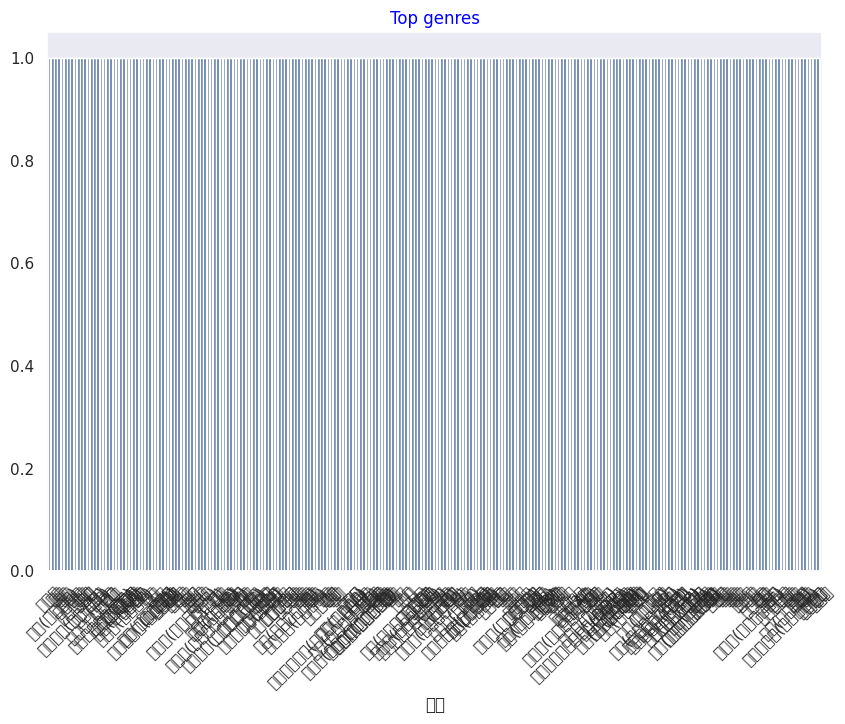

In [126]:
top = df['역명'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

<Axes: xlabel='퇴근시간승하차비율'>

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  func(*args, **kwargs)
/home/codespac

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.


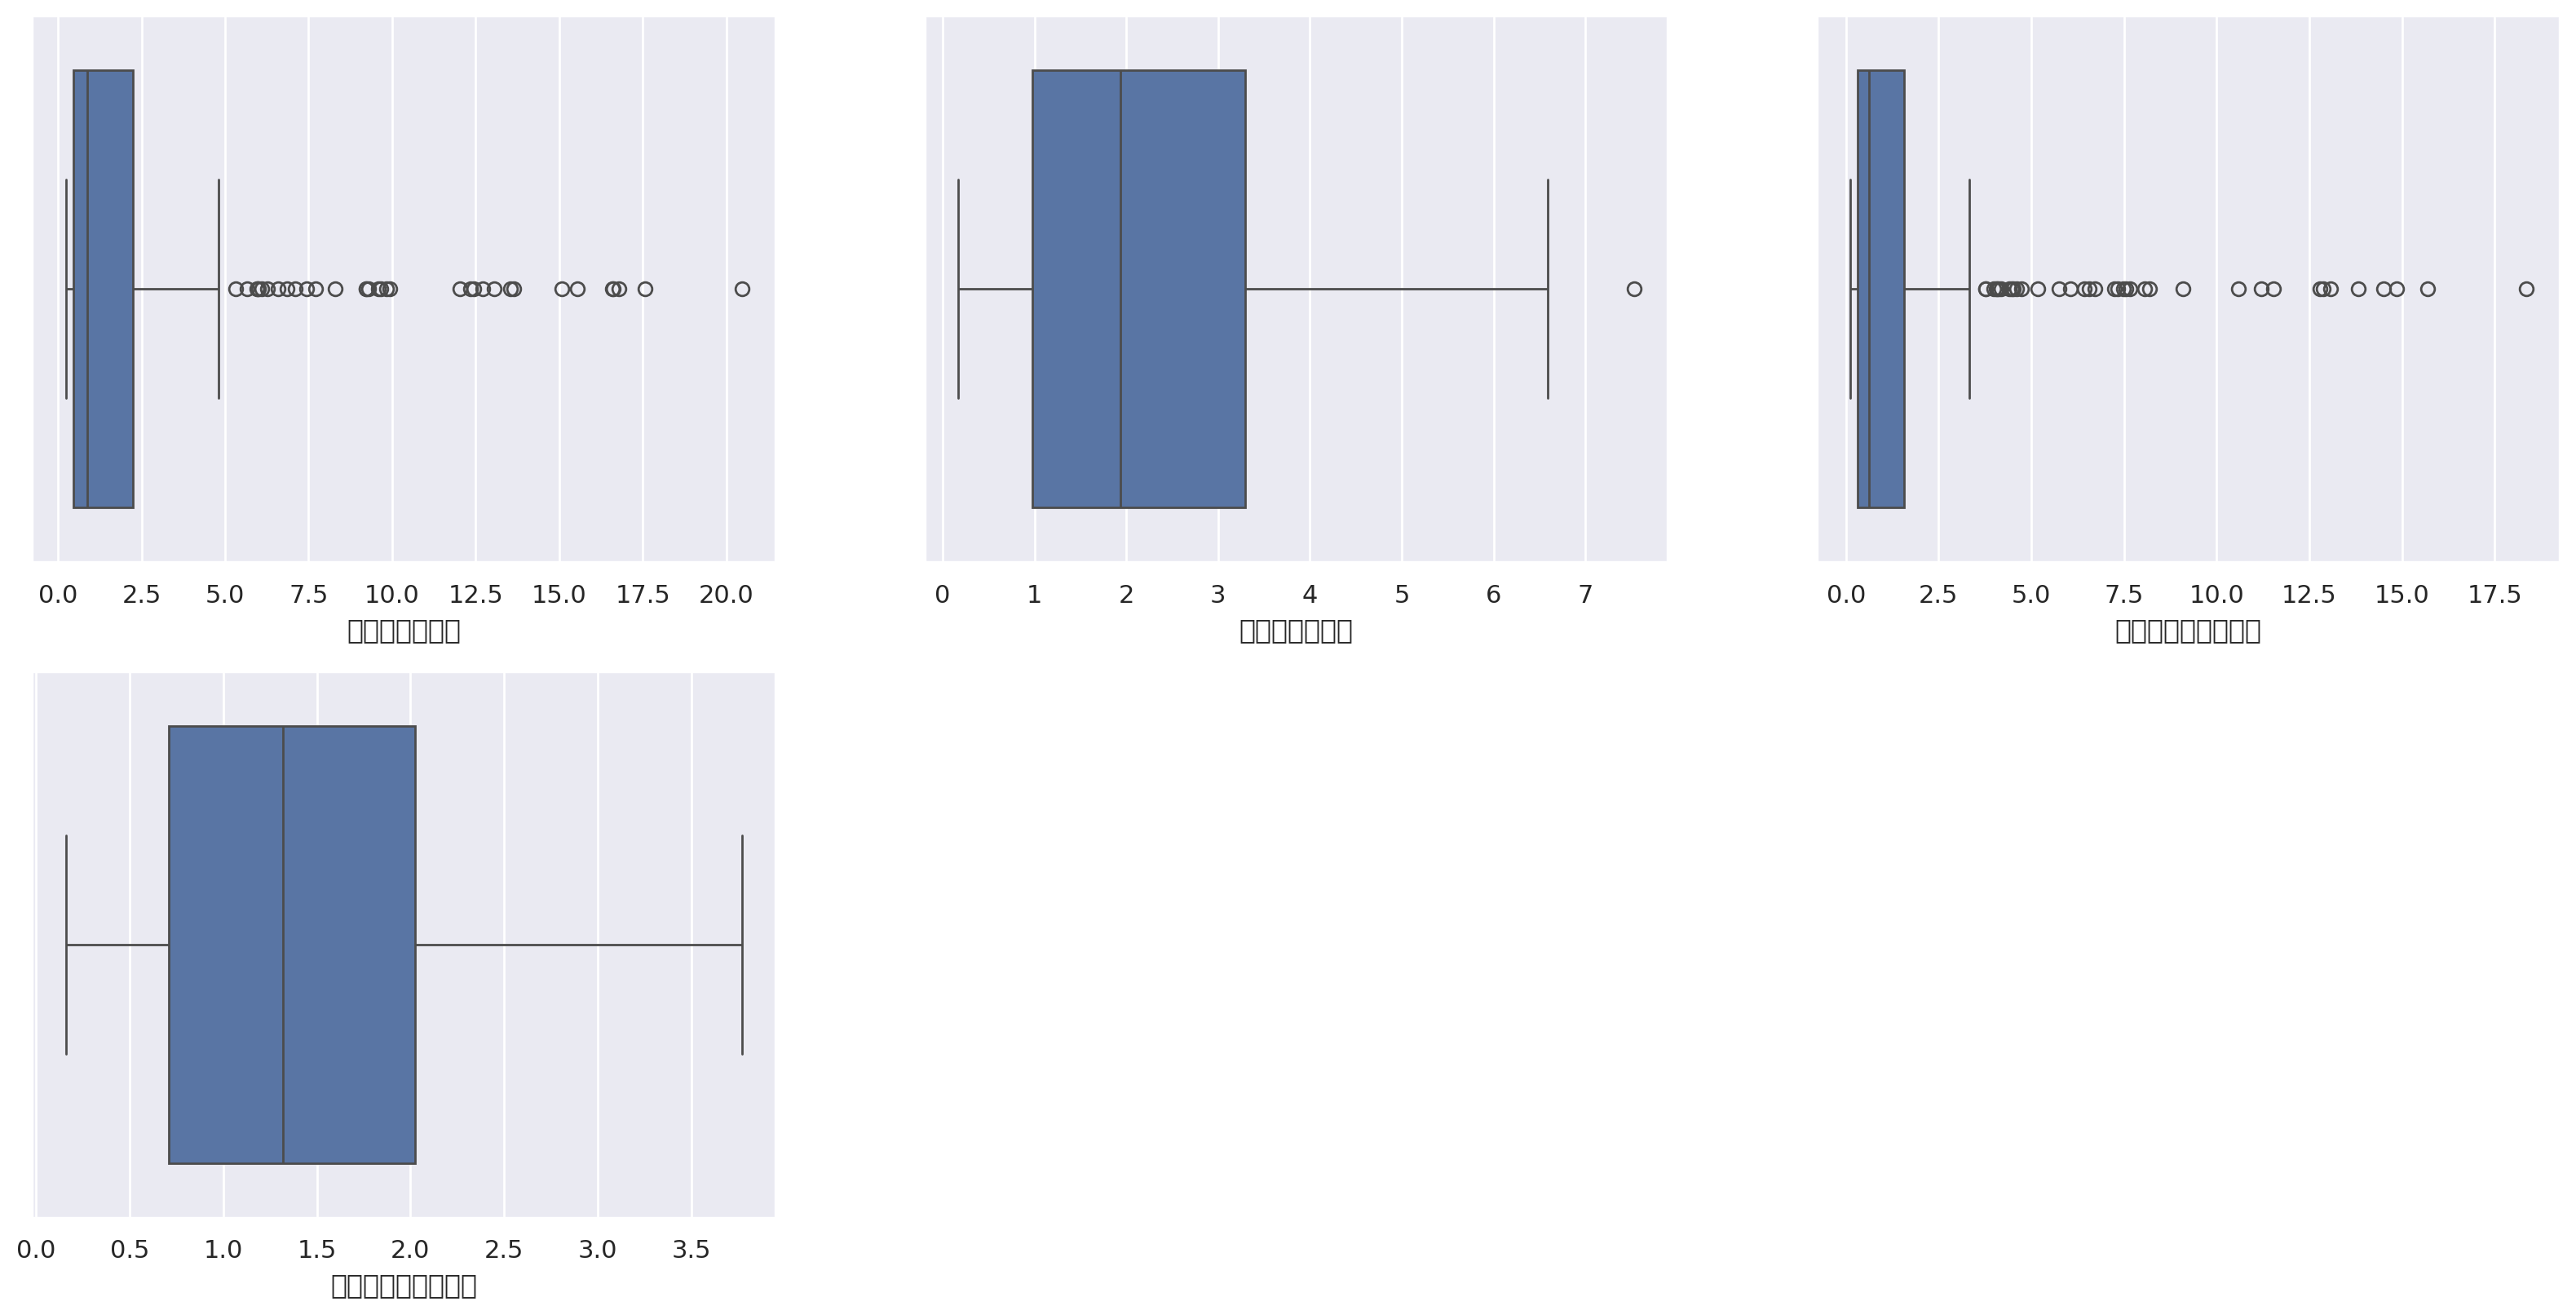

In [127]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = '출퇴근승차비율', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = '출퇴근하차비율', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = '출근시간승하차비율', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = '퇴근시간승하차비율', data = df)

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GE

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/

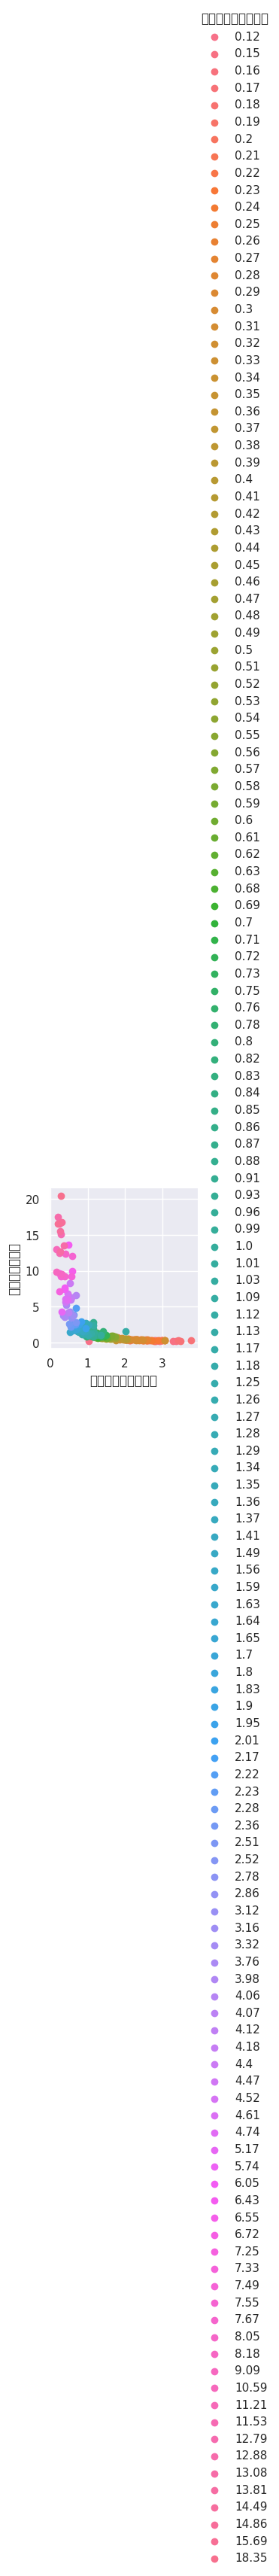

In [128]:
sns.FacetGrid(df, hue="출근시간승하차비율") \
   .map(plt.scatter, "퇴근시간승하차비율", "출퇴근승차비율") \
   .add_legend()

In [129]:
# choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('출퇴근승차비율',	'출퇴근하차비율',	'출근시간승하차비율',	'퇴근시간승하차비율')]

# y = df['출퇴근승차비율']
y = df['퇴근시간승하차비율']

# X['역명'] = le.fit_transform(X['출근시간승하차비율'])
# X['역명'] = le.fit_transform(X['출근시간승하차비율'])
X['퇴근시간승하차비율'] = le.fit_transform(X['퇴근시간승하차비율'])

# X = scaler.fit_transform(X)

y = le.transform(y)

In [130]:

from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2],
      dtype=int32)

In [131]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5894545531398111

In [132]:
# range: These are the iterations of the clustering process
# random_state: "Determines random number generation for centroid initialization."
# WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid. Source.
# Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are." Source. The value is appended to the wcss variable on each iteration.
# k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

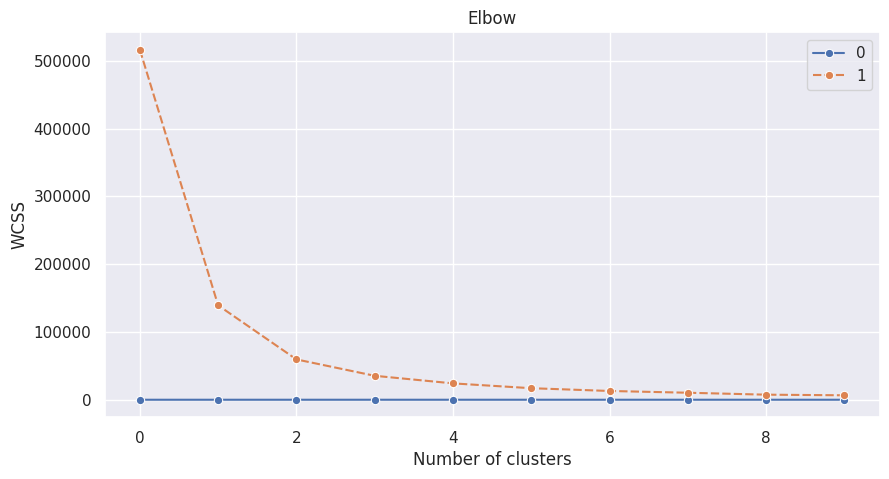

In [133]:
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.lo

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font f

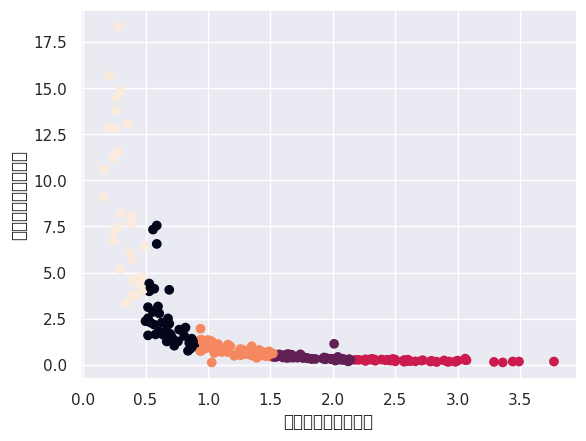

In [134]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
labels = kmeans.predict(X)
# '출퇴근승차비율',	'출퇴근하차비율',	'출근시간승하차비율',	'퇴근시간승하차비율'
plt.scatter(df['퇴근시간승하차비율'],df['출근시간승하차비율'],c = labels)
plt.xlabel('퇴근시간승하차비율')
plt.ylabel('출근시간승하차비율')
plt.show()

In [135]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2 out of 239 samples were correctly labeled.
Accuracy score: 0.01
